<a href="https://colab.research.google.com/github/tasneem94/Bioactivity-Predicition-Thesis/blob/main/Thesis_06_Plasmodium_falciparum_FNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Build a neural network for Image classification
# Train this neural network.
# Finally, evaluate the accuracy of the model.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 1: Import the neccessary modules
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Step 2: Import the MNIST Fashion Dataset
df = pd.read_csv('/content/drive/MyDrive/Thesis_Data_Plasmodium_falciparum/Plasmodium_falciparum_06_bioactivity_data_2class_binary_active_inactive_pubchem_fp.csv')


In [5]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,target
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20659,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20661,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20662,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop('target', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20659,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20661,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20662,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = df.target
Y

0        1
1        0
2        0
3        1
4        1
        ..
20659    0
20660    0
20661    0
20662    0
20663    0
Name: target, Length: 20664, dtype: int64

In [8]:
df["target"].value_counts()

1    11009
0     9655
Name: target, dtype: int64

In [9]:
X.shape

(20664, 881)

In [10]:
Y.shape

(20664,)

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [12]:
X.shape

(20664, 174)

In [13]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
X_train.shape, Y_train.shape

((16531, 174), (16531,))

In [15]:
X_test.shape, Y_test.shape

((4133, 174), (4133,))

#New try#

In [ ]:
pip install tensorflow==2.0.0

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(116, input_dim = len(X_train[0, :]), activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 116)               20300     
_________________________________________________________________
dense_8 (Dense)              (None, 40)                4680      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 25,317
Trainable params: 25,317
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
import numpy as np

In [39]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

In [40]:
history= model.fit(X_train,Y_train,epochs=200, batch_size=32)

Train on 16531 samples
Epoch 1/200
16531/16531 [==============================] - 2s 95us/sample - loss: 0.6134 - accuracy: 0.6534
Epoch 2/200
16531/16531 [==============================] - 1s 70us/sample - loss: 0.5621 - accuracy: 0.7139
Epoch 3/200
16531/16531 [==============================] - 1s 74us/sample - loss: 0.5317 - accuracy: 0.7388
Epoch 4/200
16531/16531 [==============================] - 1s 68us/sample - loss: 0.5061 - accuracy: 0.7601
Epoch 5/200
16531/16531 [==============================] - 1s 69us/sample - loss: 0.4828 - accuracy: 0.7726
Epoch 6/200
16531/16531 [==============================] - 1s 67us/sample - loss: 0.4689 - accuracy: 0.7813
Epoch 7/200
16531/16531 [==============================] - 1s 68us/sample - loss: 0.4535 - accuracy: 0.7937
Epoch 8/200
16531/16531 [==============================] - 1s 68us/sample - loss: 0.4393 - accuracy: 0.7996
Epoch 9/200
16531/16531 [==============================] - 1s 69us/sample - loss: 0.4261 - accuracy: 0.8091
Epoch

In [45]:
history2= model.fit(X_test,Y_test, epochs=200, batch_size=32)

Train on 4133 samples
Epoch 1/200
4133/4133 [==============================] - 1s 122us/sample - loss: 0.7410 - accuracy: 0.7145
Epoch 2/200
4133/4133 [==============================] - 0s 116us/sample - loss: 0.4791 - accuracy: 0.7718
Epoch 3/200
4133/4133 [==============================] - 1s 121us/sample - loss: 0.4262 - accuracy: 0.7905
Epoch 4/200
4133/4133 [==============================] - 1s 125us/sample - loss: 0.3802 - accuracy: 0.8185
Epoch 5/200
4133/4133 [==============================] - 1s 122us/sample - loss: 0.3525 - accuracy: 0.8297
Epoch 6/200
4133/4133 [==============================] - 1s 124us/sample - loss: 0.3279 - accuracy: 0.8449
Epoch 7/200
4133/4133 [==============================] - 0s 114us/sample - loss: 0.3081 - accuracy: 0.8507
Epoch 8/200
4133/4133 [==============================] - 0s 119us/sample - loss: 0.2867 - accuracy: 0.8640
Epoch 9/200
4133/4133 [==============================] - 0s 106us/sample - loss: 0.2714 - accuracy: 0.8703
Epoch 10/200
41

In [46]:
model.evaluate(X_test, Y_test)

4133/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05003735766345678, 0.9712074]

In [44]:
print(history.params)

{'batch_size': 32, 'epochs': 200, 'steps': 517, 'samples': 16531, 'verbose': 1, 'do_validation': False, 'metrics': ['loss', 'accuracy']}


In [47]:
print(history2.params)

{'batch_size': 32, 'epochs': 200, 'steps': 130, 'samples': 4133, 'verbose': 1, 'do_validation': False, 'metrics': ['loss', 'accuracy']}


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

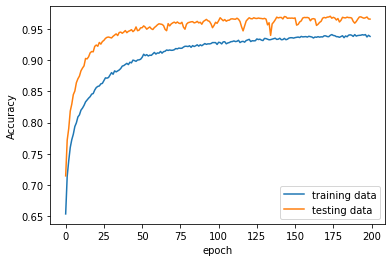

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data','testing data'],loc='lower right')
plt.show()

